In [1]:
import numpy as np
import time
import math

#DATA STRUCTURE
import heapq
from ArrayPriorityQueue import ArrayPriorityQueue
from ArrayPriorityQueue import ArrayNode

#UTILITY FUNCTION
from utils import *
import matplotlib.pyplot as plt

INF = float('inf')

## Dijkstra's Algorithm

In [2]:
def dijkstra_arr(v, adj_matrix, start):
    if start not in v:
        return {}, {} 
    #queue-content format: (vertex, dist)
    #adj-list format: (vertex, dist)
    dist = {vert:INF for vert in v}
    visited = set()
    pi = {vert:None for vert in v} 
    
    dist[start] = 0
    pq = ArrayPriorityQueue()
    pq.enqueue(start, dist[start])
    while not pq.is_empty():
        node: ArrayNode = pq.pop()
        if node.val in visited: continue
        visited.add(node.val)
        
        # print(node.val, node.priority)
        
        for neigh, weight in enumerate(adj_matrix[node.val]):
            if weight == 0: continue
            if dist[neigh] > dist[node.val] + weight:
                dist[neigh] = dist[node.val] + weight
                pi[neigh] = node.val
                pq.enqueue(neigh, dist[neigh])
    return dist, pi
    

In [3]:
def dijkstra_heap(v, adj_list, start):
    if not(start in v and adj_list[start]):
        return None, None
    
    #queue-content format: (dist, vertex)
    #adj-list format: (vertex, dist)
    dist = {vert:INF for vert in v}
    visited = set()
    pi = {vert:None for vert in v} 
       
    hp = [(0, start)]
    dist[start] = 0
    heapq.heapify(hp)
    
    while len(hp) > 0:
        _, node = heapq.heappop(hp)
        # print(node, dist[node])
        # print(dist)
        
        if node in visited: continue
        cur_dist = dist[node]
        visited.add(node)
        
        for neigh, weight in adj_list[node]:
            if dist[neigh] > cur_dist + weight:
                dist[neigh] = cur_dist + weight
                pi[neigh] = node
                heapq.heappush(hp, (dist[neigh], neigh))
    return dist, pi         
                    

In [4]:
def backtrack(pi, node):
    cur = node
    ans = []
    while pi[cur] is not None:
        ans.append(pi[cur])
        cur = pi[cur]
    return ans[::-1]

---

## Unit Testing

### Initialization Phase

In [5]:
adj_list = {
    0 : [(1, 4),(7, 8)],
    1 : [(0, 4),(7, 11),(2, 8)],
    2 : [(3, 7),(5, 4),(8, 2)],
    3 : [(2, 7),(4, 9),(5, 14)],
    4 : [(3, 9),(5, 10)],
    5 : [(2, 4), (3, 14),(4,10),(6, 2)],
    6 : [(5, 2), (8, 6), (7, 1)],
    7 : [(0, 8), (1, 11), (6, 1), (8, 7)],
    8 : [(2, 2), (6, 6), (7, 7)],
}#format (vertex, weight)

In [6]:
v = [key for key in adj_list.keys()]

In [7]:
shape = len(adj_list.keys())
adj_matrix  = adj_matrix_converter(adj_list, shape)

### Minimizing Heap Priority Queue Dijkstra

In [8]:
dist, pi = dijkstra_heap(v, adj_list, 0)
all_path = [backtrack(pi, node) for node in v]
print(f"Dist: {dist}\nPrefix: {pi}\nPath List: {all_path}")

Dist: {0: 0, 1: 4, 2: 12, 3: 19, 4: 21, 5: 11, 6: 9, 7: 8, 8: 14}
Prefix: {0: None, 1: 0, 2: 1, 3: 2, 4: 5, 5: 6, 6: 7, 7: 0, 8: 2}
Path List: [[], [0], [0, 1], [0, 1, 2], [0, 7, 6, 5], [0, 7, 6], [0, 7], [0], [0, 1, 2]]


### Array Priority Queue Dijkstra

In [9]:
dist, pi = dijkstra_arr(v, adj_matrix, 0)
all_path = [backtrack(pi, node) for node in v]

print_dist = {key:int(value) for key,value in dist.items()}
print(f"Dist: {print_dist}\nPrefix: {pi}\nPath List: {all_path}")

Dist: {0: 0, 1: 4, 2: 12, 3: 19, 4: 21, 5: 11, 6: 9, 7: 8, 8: 14}
Prefix: {0: None, 1: 0, 2: 1, 3: 2, 4: 5, 5: 6, 6: 7, 7: 0, 8: 2}
Path List: [[], [0], [0, 1], [0, 1, 2], [0, 7, 6, 5], [0, 7, 6], [0, 7], [0], [0, 1, 2]]


---

## Performance Analysis

In [10]:
def time_counter(func, *args, **kwargs):
    start = time.perf_counter()
    func(*args, **kwargs)
    end = time.perf_counter()
    return end - start

In [11]:
node_sizes = [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000, 3000]
freq_each_size = 10

av_perf_log = np.zeros(shape=(len(node_sizes),))
std_perf_log = np.zeros(shape=(len(node_sizes),))
perf_log= {size:np.zeros(shape=(freq_each_size,), dtype=np.float64) for size in node_sizes}

av_perf_log_heap = np.zeros(shape=(len(node_sizes),))
std_perf_log_heap = np.zeros(shape=(len(node_sizes),))
perf_log_heap= {size:np.zeros(shape=(freq_each_size,), dtype=np.float64) for size in node_sizes}

In [12]:
for idx, size in enumerate(node_sizes):
    for i in range(freq_each_size):
        print(f"N = {size}, freq = {i}")
        adj_list = general_graph_generator(size)
        start_node = 0
        vertex = adj_list.keys()
        
        perf_log[size][i] = time_counter(dijkstra_arr, \
                                         v=vertex, \
                                         adj_matrix=adj_matrix_converter(adj_list, size), \
                                         start=start_node)
        print(f"Arr(ms): {perf_log[size][i] * 1000:.5f}", end="\t")
        perf_log_heap[size][i] = time_counter(dijkstra_heap, \
                                         v=vertex, \
                                         adj_list=adj_list, \
                                         start=start_node)
        print(f"Heap(ms): {perf_log_heap[size][i] * 1000:.5f}")
        del adj_list
    print(f"N = {size} Done!\n")
    av_perf_log[idx] = (np.mean(perf_log[size]))
    std_perf_log[idx] = (np.std(perf_log[size]))
    
    av_perf_log_heap[idx] = (np.mean(perf_log_heap[size]))
    std_perf_log_heap[idx] = (np.std(perf_log_heap[size]))

N = 100, freq = 0
Arr(ms): 2.26650	Heap(ms): 0.31200
N = 100, freq = 1
Arr(ms): 2.06030	Heap(ms): 0.30530
N = 100, freq = 2
Arr(ms): 1.96370	Heap(ms): 0.28040
N = 100, freq = 3
Arr(ms): 2.07270	Heap(ms): 0.39400
N = 100, freq = 4
Arr(ms): 1.95220	Heap(ms): 0.31560
N = 100, freq = 5
Arr(ms): 1.97290	Heap(ms): 0.27220
N = 100, freq = 6
Arr(ms): 2.84540	Heap(ms): 0.35170
N = 100, freq = 7
Arr(ms): 2.37120	Heap(ms): 0.25860
N = 100, freq = 8
Arr(ms): 1.95030	Heap(ms): 0.26060
N = 100, freq = 9
Arr(ms): 2.02880	Heap(ms): 0.26420
N = 100 Done!

N = 200, freq = 0
Arr(ms): 7.41070	Heap(ms): 1.01990
N = 200, freq = 1
Arr(ms): 8.93330	Heap(ms): 1.06720
N = 200, freq = 2
Arr(ms): 7.87310	Heap(ms): 0.96550
N = 200, freq = 3
Arr(ms): 8.13780	Heap(ms): 1.16830
N = 200, freq = 4
Arr(ms): 8.13750	Heap(ms): 1.05270
N = 200, freq = 5
Arr(ms): 8.24040	Heap(ms): 0.95430
N = 200, freq = 6
Arr(ms): 9.82100	Heap(ms): 1.00510
N = 200, freq = 7
Arr(ms): 8.46430	Heap(ms): 0.98480
N = 200, freq = 8
Arr(ms): 8.36

In [13]:
coeff_arr = np.polyfit(node_sizes, av_perf_log, deg=2)
fit_arr = np.poly1d(coeff_arr)
coeff_heap = np.polyfit(node_sizes * np.log(node_sizes), av_perf_log_heap, deg=2)
fit_heap = np.poly1d(coeff_heap)

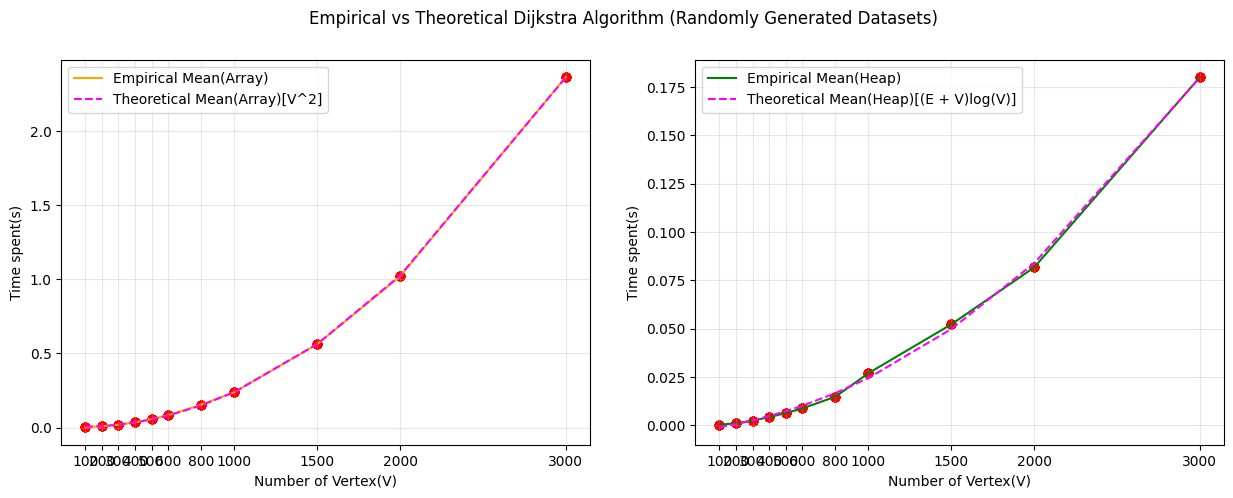

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15, 5))
axes = axes.flatten()

fig.suptitle('Empirical vs Theoretical Dijkstra Algorithm (Randomly Generated Datasets)')

axes[0].plot(node_sizes, av_perf_log, label="Empirical Mean(Array)", color='orange')
axes[1].plot(node_sizes, av_perf_log_heap, label="Empirical Mean(Heap)", color='green')

axes[0].set_xticks(node_sizes); axes[1].set_xticks(node_sizes)

axes[0].plot(node_sizes, fit_arr(node_sizes), label="Theoretical Mean(Array)[V^2]", color='magenta', linestyle='--')
axes[1].plot(node_sizes, fit_heap(np.log(node_sizes)*node_sizes), label="Theoretical Mean(Heap)[(E + V)log(V)]", color='magenta', linestyle='--')

for key in node_sizes:
    axes[0].scatter(node_sizes, av_perf_log, color='red')
    axes[1].scatter(node_sizes, av_perf_log_heap, color='red')

for ax in axes:
    ax.set_xlabel('Number of Vertex(V)')
    ax.set_ylabel('Time spent(s)')
    ax.grid(alpha=0.3)
    ax.legend()
    
plt.show()

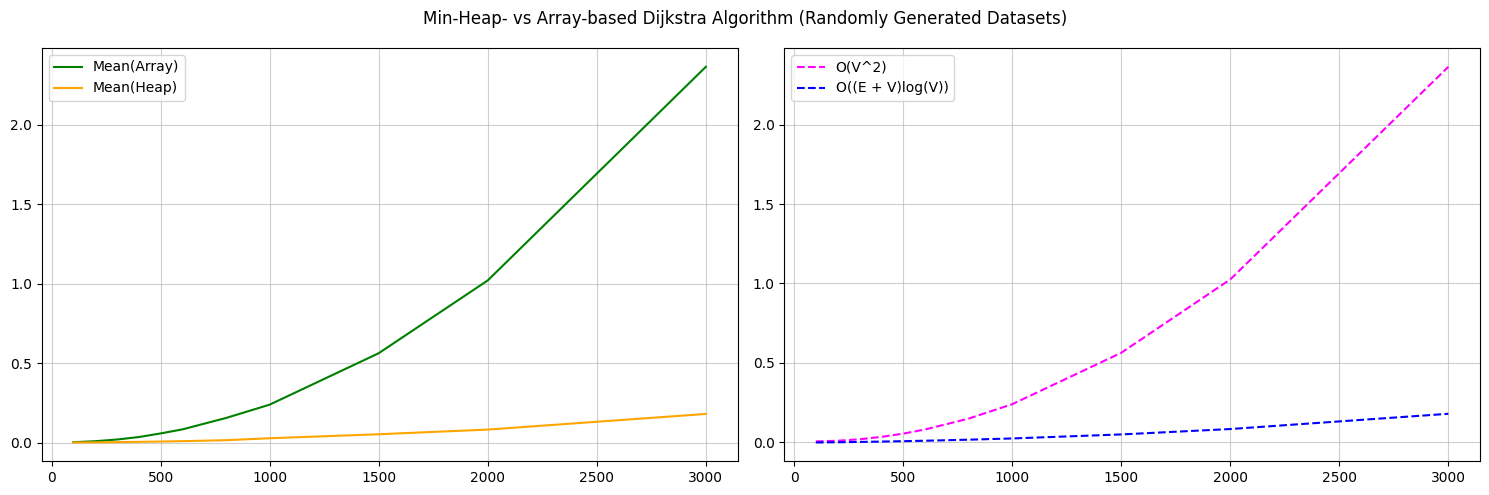

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15, 5))
axes = axes.flatten()
fig.suptitle('Min-Heap- vs Array-based Dijkstra Algorithm (Randomly Generated Datasets)')

axes[0].plot(node_sizes, av_perf_log, label="Mean(Array)", color='green')
axes[1].plot(node_sizes, fit_arr(node_sizes), label="O(V^2)", color='magenta', linestyle='--')
axes[0].plot(node_sizes, av_perf_log_heap, label="Mean(Heap)", color='orange')
axes[1].plot(node_sizes, fit_heap(np.log(node_sizes)*node_sizes), label="O((E + V)log(V))", color='blue', linestyle='--')

for ax in axes:
    ax.grid(alpha=0.6)
    ax.legend()
plt.tight_layout()
plt.show()


In [16]:
av_perf_log_con = np.zeros(shape=(len(node_sizes),))
std_perf_log_con = np.zeros(shape=(len(node_sizes),))
perf_log_con= {size:np.zeros(shape=(freq_each_size,), dtype=np.float64) for size in node_sizes}

av_perf_log_con_heap = np.zeros(shape=(len(node_sizes),))
std_perf_log_con_heap = np.zeros(shape=(len(node_sizes),))
perf_log_con_heap= {size:np.zeros(shape=(freq_each_size,), dtype=np.float64) for size in node_sizes}

In [24]:
for idx, size in enumerate(node_sizes):
    for i in range(freq_each_size):
        print(f"N = {size}, freq = {i}")
        adj_list = connected_undirected_graph_generator(size)
        start_node = 0
        vertex = adj_list.keys()
        
        perf_log_con[size][i] = time_counter(dijkstra_arr, \
                                         v=vertex, \
                                         adj_matrix=adj_matrix_converter(adj_list, size), \
                                         start=start_node)
        print(f"Arr(ms): {perf_log_con[size][i] * 1000:.5f}", end="\t")
        perf_log_con_heap[size][i] = time_counter(dijkstra_heap, \
                                         v=vertex, \
                                         adj_list=adj_list, \
                                         start=start_node)
        print(f"Heap(ms): {perf_log_con_heap[size][i] * 1000:.5f}")
    print(f"N = {size} Done!\n")
    av_perf_log_con[idx] = np.mean(perf_log_con[size])
    std_perf_log_con[idx] = np.std(perf_log_con[size])
    
    av_perf_log_con_heap[idx] = np.mean(perf_log_con_heap[size])
    std_perf_log_con_heap[idx] = np.std(perf_log_con_heap[size])

N = 100, freq = 0
Arr(ms): 2.36230	Heap(ms): 0.59480
N = 100, freq = 1
Arr(ms): 2.75060	Heap(ms): 0.50230
N = 100, freq = 2
Arr(ms): 2.21540	Heap(ms): 0.68740
N = 100, freq = 3
Arr(ms): 2.45830	Heap(ms): 0.50970
N = 100, freq = 4
Arr(ms): 2.25620	Heap(ms): 0.43360
N = 100, freq = 5
Arr(ms): 2.14410	Heap(ms): 0.41540
N = 100, freq = 6
Arr(ms): 2.32500	Heap(ms): 0.45560
N = 100, freq = 7
Arr(ms): 2.14120	Heap(ms): 0.48890
N = 100, freq = 8
Arr(ms): 2.28840	Heap(ms): 0.49770
N = 100, freq = 9
Arr(ms): 2.43900	Heap(ms): 0.44610
N = 100 Done!

N = 200, freq = 0
Arr(ms): 11.27680	Heap(ms): 5.11620
N = 200, freq = 1
Arr(ms): 8.77730	Heap(ms): 5.05830
N = 200, freq = 2
Arr(ms): 9.27710	Heap(ms): 5.96260
N = 200, freq = 3
Arr(ms): 9.52390	Heap(ms): 5.28680
N = 200, freq = 4
Arr(ms): 11.48550	Heap(ms): 5.14280
N = 200, freq = 5
Arr(ms): 9.69580	Heap(ms): 5.41430
N = 200, freq = 6
Arr(ms): 9.93990	Heap(ms): 4.77590
N = 200, freq = 7
Arr(ms): 9.59020	Heap(ms): 5.10030
N = 200, freq = 8
Arr(ms): 8.

In [25]:
av_perf_log_con

array([2.33805000e-03, 9.76564000e-03, 2.23660700e-02, 4.09780900e-02,
       6.30208400e-02, 9.27176000e-02, 1.66403270e-01, 2.68211690e-01,
       6.11518780e-01, 1.09896564e+00, 2.57440976e+00])

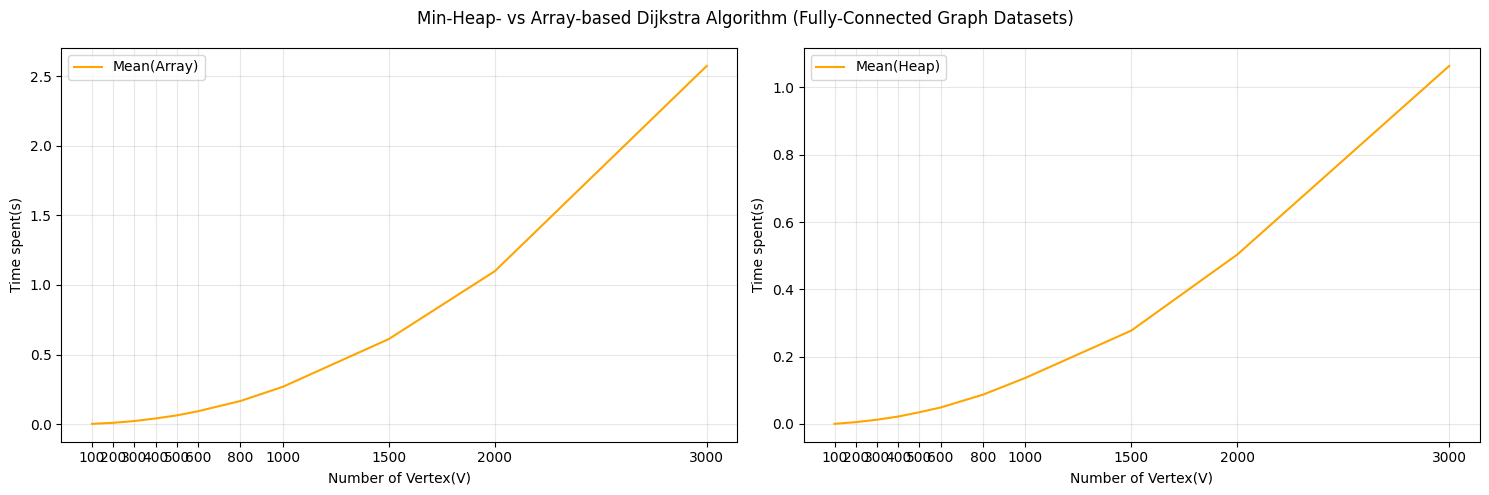

In [26]:
fig, axes = plt.subplots(1,2,figsize=(15, 5))

fig.suptitle('Min-Heap- vs Array-based Dijkstra Algorithm (Fully-Connected Graph Datasets)')

axes[0].plot(node_sizes, av_perf_log_con, label="Mean(Array)", color='orange')
axes[1].plot(node_sizes, av_perf_log_con_heap, label="Mean(Heap)", color='orange')

axes[0].set_xticks(node_sizes)
axes[1].set_xticks(node_sizes)

for ax in axes:
    ax.set_xlabel('Number of Vertex(V)')
    ax.set_ylabel('Time spent(s)')
    ax.grid(alpha=0.3)
    ax.legend()

plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_42544\2737712830.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


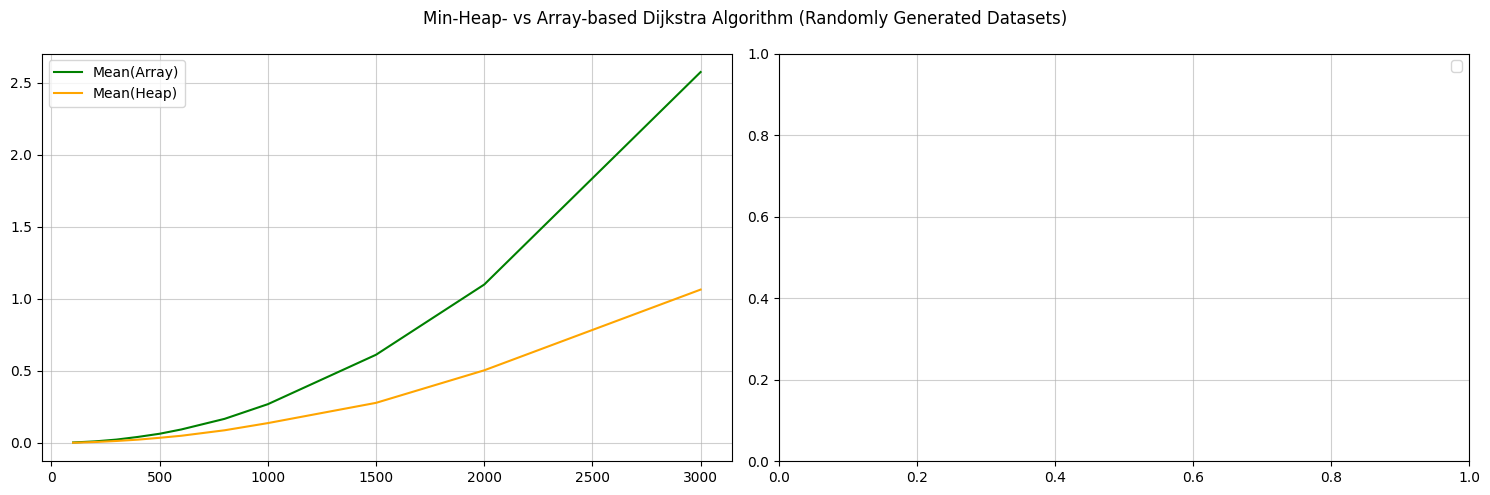

In [34]:
fig, axes = plt.subplots(1,2,figsize=(15, 5))

fig.suptitle('Min-Heap- vs Array-based Dijkstra Algorithm (Randomly Generated Datasets)')

axes[0].plot(node_sizes, av_perf_log_con, label="Mean(Array)", color='green')
#axes[1].plot(node_sizes, fit_arr(node_sizes), label="O(V^2)", color='magenta', linestyle='--')
axes[0].plot(node_sizes, av_perf_log_con_heap, label="Mean(Heap)", color='orange')
#axes[1].plot(node_sizes, fit_heap(np.log(node_sizes)*node_sizes), label="O((E + V)log(V))", color='blue', linestyle='--')

for ax in axes:
    ax.grid(alpha=0.6)
    ax.legend()

plt.tight_layout()
plt.show()